# [ESPM-163ac] Lecture - Introduction to Prediction!

*Estimated Time: 50 minutes*

Now that you have had an introduction to programming, we are going to start using these tools to explore our dataset!

In [1]:
# These are tools we will use later. Just run the cell.
import numpy as np
import matplotlib.pyplot as plots
from datascience import *
import statsmodels.formula.api as sm
%matplotlib inline 
plots.style.use("fivethirtyeight")

## 1. Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis.

Some examples of data that have a high correlation:

    Your caloric intake vs. your weight.
    Your eye color vs. your relatives’ eye colors.
    The amount of time you study vs. your GPA.
    Alcohol consumed vs. your blood alcohol content.

Some examples of data that have a low correlation (or none at all):

    Your sexual preference vs. the type of cereal you eat.
    A dog’s name vs. the type of dog biscuit they prefer.
    The cost of a car wash vs. how long it takes to buy a soda inside the station.

Correlations are useful because if you can find out what relationship variables have, you can make predictions about future behavior. Knowing what the future holds is very important in the social sciences like government and healthcare.

You make decisions based on relationships of two events all the time: if it's 2pm on a Thursday of Deadweek, you predict the number of seats avaiable in Moffitt Floor 5 would be close to none and would think twice about trying your luck there. As simple as this is, this is correlation and prediction at work: time of semester vs. the number of seats available in Moffitt Floor 5. This is exacltly what we are going in this lecture -- **the correlation coefficient simply assigns a number to the *type* and *strength* of a relationship between two events**.

The **correlation coefficient** ( r ) puts a value to the relationship and shows how strong it is. The value is between -1 and 1 where 0 is no relationship, -1 is a perfect negative relationship, and 1 is a perfect positive relationship. Correlation is also necessary for regression (which we will get to later).

![image](../images/correlation-examples.svg)

If we wanted to look at the relationship between two of the variables in our dataset, we could calculate the correlation. For example, asking how race is related to a particular health factor, such as asthma.

In [2]:
clean_ces_data = Table.read_table("../data/cleaned_data_new.csv")
clean_ces_data.show(5)

census_tract,hispanic,white,african_american,native_american,asian_american,other,unemployment,poverty,ces_pollution_score,ozone,pesticides,tox_release,asthma,cardiovascular_disease,low_birth_weight
6.019e+09,65.3,4.2,24.6,0.5,3.5,1.8,17.6,76.3,94.09,0.065,2.75,18552,131.64,14.13,7.44
6.071e+09,91.1,5.8,0.7,0.3,1.4,0.7,12.3,72.5,90.68,0.062,1.37,7494.24,60.66,12.94,7.04
6.019e+09,63.6,5.3,18.9,0.6,9.8,1.8,16.1,86.8,85.97,0.062,3.03,12454.9,142.12,14.96,10.16
6.077e+09,57.4,6,12.5,0.3,20.9,2.8,19.6,61.3,82.49,0.046,12.93,2387.78,142.17,14.72,6.23
6.019e+09,71.8,21.4,1.2,0.5,4.5,0.6,18.6,66.4,82.03,0.065,3518.41,21790.7,90.48,12.82,4.5


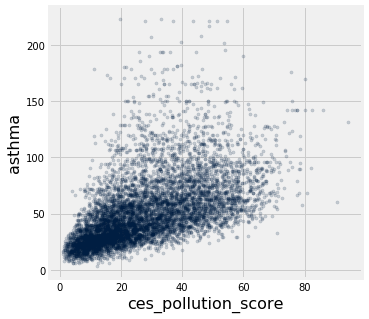

In [3]:
clean_ces_data.scatter("ces_pollution_score", "asthma", alpha = .18, s = 10)

#### Based on this scatter plot, what do you think the r-value is?
In other words, about how closely are pollution and asthma related? Compare this graph with the charts above to help you identify the **type** (Positive? Negative?) and **strength** (value) of the relationship.

*Your Guess Here*

#### Correlation Function!

To see how well your guess matches the actual r-value, we can use the `correlation` function defined below. For the purposes of this lecture on your lab, don't worry about **how** we calculate correlation. If you're interested in the math behind the calculation, take an into to statistics class (Stat 20, Data 8, etc)!

Read how to **use** the function (written in red, under the `def` statement). We'll use this function to calculate the actual correlation coefficient between the pollution score and asthma. Remember:
* `Parameters` tell you what goes **into** the function
* `Returns` tells you what the function **outputs**
* `Example` provides an example of the function in use

In [4]:
#This is a helper function we use to define the correlation equation: you can ignore this for the purposes of this class
def standard_units(xyz): 
    return (xyz - np.mean(xyz))/np.std(xyz) 

In [5]:
#Read the doc string for this function!
def correlation(table, label_x, label_y):
    """Calculates the correlation coefficient between two variables in a table
    
    Parameters
    ----------
    table:
        The data table containing the column to be repeated.
    label_x: 
        The the name of a column (in quotes) of the table containing one of the variables of interest
    label_y: 
        The the name of another column (in quotes) of the table containing the other variables of interest
        
    Returns
    -------
    int
        A single numeric value which is the correlation coefficient between `label_x` and `label_y`
        
    Example
    -------
    >>> correlation(clean_ces_data, 'unemployment', 'poverty')
    
    0.6046862173005914    
    """
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

In [6]:
#Run me to find the actual correlation coefficient!
correlation(clean_ces_data, 'ces_pollution_score', 'asthma')

0.5452274394377603

It's certainly not perfect -- if you are given a pollution score, you can't say that the number of reported asthma attacks **will definitely** be \_\_. However, you can see (both from the plot and from the calculated r-value) that there is a positive relationship between a census tract's pollution score and the number of reported asthma attacks.

---

## 2. Predicting with Simple Linear Regression
In this section, we'll explore the correlation coefficient in the context of making predictions. To start, let's explore some made up data to get an intuitive idea of what Linear Regression is.

### Quick Demo:
Run the cell block below.

In [7]:
###*** Run this Code Block ONCE: ***###
noise_highr = np.random.normal(0,.2,50)
noise_lowr = np.random.normal(0,.95,50)
noise_rand = np.random.normal(0, 1.65, 50)
noise_rand = np.array([abs(v) if abs(v)<4 else 0 for v in noise_rand])
x = np.linspace(2,4.5,50)

demo = Table().with_columns('x', x,
                    'y_highr', .8*x + noise_highr,
                    'y_lowr', .8*x + noise_lowr,
                    'y_rand', noise_rand)

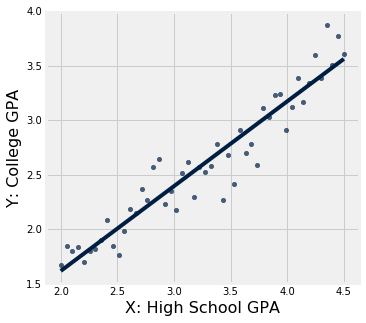

In [8]:
# Interactive Cell: Run as many times as you'd like
demo.scatter('x','y_highr', fit_line = True);
plots.ylabel('Y: College GPA');
plots.xlabel('X: High School GPA');

As you can see, Simple Linear Regression is really just a term for **making predictions using a line**.

**Question**: Given the plot and regression line above, how would you predict a student's College GPA given that the student had a High School GPA of 3.0?

*YOUR ANSWER HERE*


### Equation of our Line!

To get the actual value of predicted Y value for each X value, we need the equation of the line!
From you high school algebra class, remember that any line can be written in the form: 

<span style="color:navy">$$Y = mX + b$$</span>

In the example above:
- `Y` is what you are predicting (e.g. University GPA) and
- `X` is what you are basing the prediction off of (e.g. High School GPA)

So, all we need to make predictions are two values:
- the slope (`m`) and
- the intercept (`b`) of the line!


In a moment, we will define functions to evaluate the slope and intercept of the line for some given data. Before that, let's build some intuition on what these two values signify.

If you recall from your algebra classes:

- the y-intercept  is just what the Y-value is expected to be when X = 0 (where the line crosses the y-axis), and 
- the **slope** tell you how much the Y-value changes when the X-value changes by 1. 

In other words, the **slope** is highly dependent on the **relationship** between X and Y -- it is dependent on the **the correlation coefficient**.

_**We need to find the correlation coefficient in order to find the equation for the regression line.**_

You don't need to know how any of the following functions are defined: we've given you everything you need to calculate the slope and intercept of the regression line -- all you need to do is to **run the cell below**, and we will show you how to use the functions.

In [ ]:
#this is the same correlation function we defined above, here again to remind you we use them to calculate slope and intercept
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.
def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used to calculate slope!
    return r*np.std(table.column(label_y))/np.std(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.mean(table.column(label_y)) - slope(table, label_x, label_y)*np.mean(table.column(label_x))

---

## Back to our data set

Given our CalEnviroScreen table, our goal is to discover something about the data that will enhance our understanding of a population. Correlation allows us to determine a preliminary relationship between two variables (such as **asthma** and **race**) and allows us to continue with regression, which explores the relationship further and gives us a best-fit line. In the next lab, we will be putting these skills to use to calculate the correlation coefficients and regression lines with factors from our dataset. We will do this using functions that calculate it for us! They will look something like this:

In [ ]:
clean_ces_data.show()

In [ ]:
# This calculates the slope of our regression line.
slope_of_reg_line = slope(clean_ces_data, "ces_pollution_score", "asthma")
slope_of_reg_line

In [ ]:
# This will calculate our intercept.
intercept_of_reg_line = intercept(clean_ces_data, "ces_pollution_score", "asthma")
intercept_of_reg_line

Now that you have a slope (m) and intercept (b), we can plug them into the equation <span style ="color:navy">$Y = mX + b$</span> and create the regression line.
What is the regression line for pollution acore and asthma?

**Your Answer Below:**

Y = 

Now that we have the equation, we can **plot it over our scatter plot** to visualize the prediction line on top of the actual data. The code cell below takes our slope / intercept and creates the equation above (don't worry about how it is implemented). We can use this function to draw the regression line on top of our scatter plot!

In [ ]:
# defining the equation in Python!
y = lambda x: slope_of_reg_line*x+intercept_of_reg_line 

In [ ]:
plots.figure(figsize = (5,5));
#regular scatter plot
clean_ces_data.scatter("ces_pollution_score", "asthma", alpha = .16, s = 10);
#drawing the regression line
plots.plot(clean_ces_data.column('ces_pollution_score'), y(clean_ces_data.column('ces_pollution_score')), c = 'orange'); 
plots.yticks(np.arange(0,225,50))
plots.ylim(ymax=240);
plots.title("Y = 1.022*X + 23.657");

The gold line above is the equation of the line you derived: <span style='color:orange'>$Y = 1.022*X + 23.657$</span>. Amazingly, this simple line created by the equation in yellow is the **best** linear predictor of the data: out of all the infinitely many possible combinations of slopes and intercepts, the one we get from our functions predicts our data the best. If you know that a census tract is 80% hispanic, how many incidents of asthma would you guess that census tract to report? What if a census tract is 20% hispanic?

As you have seen, the `.scatter()` function we learned last lab has a setting that allows us to draw the regression line within the scatterplot (without doing any calculations!). The additional three paramters (inputs) in the `clean_ces_data.scatter(...)` function allows us to do the following:
* `fit_line = True` draws the **regression line** onto the normal scatter plot
* `s = 10` reduces the **size** of each "dot" to get rid of clutter
* `alpha = .18` increases the **transparency** of each "dot" so we can see which area is more **densely packed**

Feel free to change the values and see what they do!

Run the cell below and compare it to the plot above.

In [ ]:
#the following prints out the correlation coefficient derived from the correlation function
print('r: ', correlation(clean_ces_data, 'ces_pollution_score', 'asthma'))
clean_ces_data.scatter("ces_pollution_score", "asthma", fit_line=True, alpha = .18, s = 10)

We have the r-value above from the correlation function: `r = 0.5452274394377603`.
Does this make sense given the scatter plot above?

### Coefficient of Determination: How Good is our Predictive Model?

We know how to assess the relationship between two variables. This relationship is used to derive the linear regression equation. But what if we want to assess how **effective** our linear regression model is?

That is where the **Coefficient of Determination**, also called **r-squared**, comes in. It helps us assess the effectiveness of our predictive model and, more importantly, allows us to **compare** the effectiveness amongst various predictive models.

Here is all you need to know about **r-squared**:
<div class="alert alert-info">
It's a number ranging from <b>0 to 1</b> that tells you how well the model predicts the outcome: 1 is a perfect prediction (if you know the X-value, you definitely know the Y-Value) while 0 is a terrible prediction (you might as well guess!)
</div>


*Side Note:*
It's called **r-squared** because in simple linear regression, the **Coefficient of Determination** is just the **square of the Correlation Coefficient r**. However, when we get to Multiple Regression (where we use *TWO* X variables to predict a Y variable), we can't just rely on the relationship between **two** variables to evaluate the effectiveness of the model because the model uses **three or more** variables. So, using r-squared allows us to compare model performance between any type of regression model!

Run the cell below to find the R-squared value:

In [ ]:
model = sm.ols(formula='asthma ~ ces_pollution_score', data = clean_ces_data)
fit = model.fit()
fit.summary()

`r:  0.5452274394377603`
`r-squared: 0.297`

How good do you think our predictive model is, given that our r-squared value is 0.297?

---

## 3. Your Turn!

In previous example, we explored the relationship between an environmental outcome and a health issue. Now let's look at how this health issue compares with a certain demographic.

In [ ]:
# This will find the correlation coefficient between African Americans and Asthma.
print('r: ', correlation(clean_ces_data, 'african_american', 'asthma'))
clean_ces_data.scatter("african_american", "asthma", alpha = .18, s = 10)

`r:  0.4986847676603604`

In [ ]:
# Now fill this in to find the slope of our regression line.
slope_of_reg_line = ...
slope_of_reg_line

In [ ]:
# Now fill this in to find the intercept of our regression line.
intercept_of_reg_line = ...
intercept_of_reg_line

In [ ]:
print('r: ', correlation(clean_ces_data, 'african_american', 'asthma'))
clean_ces_data.scatter("african_american", "asthma", fit_line=True, alpha = .18, s = 10)

In [ ]:
model = sm.ols(formula='asthma ~ african_american', data = clean_ces_data)
fit = model.fit()
fit.summary()

`r-squared: 0.249`

Since our r-value is low (far from 1) it shows us that we need to conduct a multiple regression because a single variable is not sufficient to predict asthma. Usually, there are multiple factors that affect an outcome so it makes sense that we need to do more than a simple analysis.

---

Predictions are a powerful tool that we will explore more in the next lab using these techniques! If you would like to learn more about the theory behind standard units or explore these equations further, statistics classes or data 8 are great places to start!

**CONGRATULATIONS!!!** You've made it through an introduction to correlation and prediction! In lab next week, we will revisit these concepts and delve further into analysis. See you then!


## Peer Consulting Office Hours
If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You can check for availability of Peer Consultants on the **third floor of Moffitt library** (right across from the entrance) with this detailed [Office Hours schedule](https://data.berkeley.edu/education/peer-consulting). Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world or other data science courses offered at Berkeley -- make sure to take advantage of this wonderful resource!

---

**Citation:**

- [DS Modules](https://github.com/ds-modules)
- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/)
- Pierce, Rod. "Correlation" Math Is Fun. Ed. Rod Pierce. 5 Nov 2018. 16 Feb 2019 <http://www.mathsisfun.com/data/correlation.html>

*Notebook developed by: Aarish Irfan, Alleanna Clark & Keiko Kamei*